Script with loop to generate FFTs of important regions 

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tvb.simulator.lab import *
import h5py
import os
import matplotlib.pyplot as plt

import scipy 
import scipy.fftpack

In [3]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/DATA")

In [4]:
#import healthy Q = 1 data    = model with same parameters in all regions
filename = "Healthy15s.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataHealthyOne = np.array(datapoints)
timeHealthyOne = np.array(datatime)

#import depressed model with Q = 0 in some regions
filename = "Depr15s.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataDepr = np.array(datapoints)
timeDepr = np.array(datatime)

Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>


In [5]:
#delete first 500ms from datasets (both data and time) to cut out the artefact in the beginning 

#create list with values 0 to 499 to delete first 500 rows 
list_deleterows = [*range(0,500,1)]

#delete first 500 rows from all datasets (both datapoints and time)
dataDepr = np.delete(dataDepr, list_deleterows, 0)
timeDepr = np.delete(timeDepr, list_deleterows, 0)

dataHealthyOne = np.delete(dataHealthyOne, list_deleterows, 0)
timeHealthyOne = np.delete(timeHealthyOne, list_deleterows, 0)

print(dataDepr.shape)
print(timeDepr.shape)

(14860, 4, 76, 1)
(14860,)


In [6]:
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions_list = list(f['region_labels'])

regions = np.array(regions_list)
print(regions)
print(regions_list)

print(regions.shape)
print(regions.ndim)

#interesting regions
# 18 = rDLPFC
# 21 = rPFCORB
# 35 = rV1
# 36 = rV2

# 56 = lDLPFC
# 59 = rPFCORB
# 73 = rV1
# 74 = rV2

#parietal cortex
#PCM  = 15
#PCI  = 13
#PCS  = 16


#make selection of regions to loop through 
indices = [13,18,35] #[13,15,16,18,21,35,36,56,59,73,74]

Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>
['rA1' 'rA2' 'rAMYG' 'rCCA' 'rCCP' 'rCCR' 'rCCS' 'rFEF' 'rG' 'rHC' 'rIA'
 'rIP' 'rM1' 'rPCI' 'rPCIP' 'rPCM' 'rPCS' 'rPFCCL' 'rPFCDL' 'rPFCDM'
 'rPFCM' 'rPFCORB' 'rPFCPOL' 'rPFCVL' 'rPHC' 'rPMCDL' 'rPMCM' 'rPMCVL'
 'rS1' 'rS2' 'rTCC' 'rTCI' 'rTCPOL' 'rTCS' 'rTCV' 'rV1' 'rV2' 'rCC' 'lA1'
 'lA2' 'lAMYG' 'lCCA' 'lCCP' 'lCCR' 'lCCS' 'lFEF' 'lG' 'lHC' 'lIA' 'lIP'
 'lM1' 'lPCI' 'lPCIP' 'lPCM' 'lPCS' 'lPFCCL' 'lPFCDL' 'lPFCDM' 'lPFCM'
 'lPFCORB' 'lPFCPOL' 'lPFCVL' 'lPHC' 'lPMCDL' 'lPMCM' 'lPMCVL' 'lS1' 'lS2'
 'lTCC' 'lTCI' 'lTCPOL' 'lTCS' 'lTCV' 'lV1' 'lV2' 'lCC']
['rA1', 'rA2', 'rAMYG', 'rCCA', 'rCCP', 'rCCR', 'rCCS', 'rFEF', 'rG', 'rHC', 'rIA', 'rIP', 'rM1', 'rPCI', 'rPCIP', 'rPCM', 'rPCS', 'rPFCCL', 'rPFCDL', 'rPFCDM', 'rPFCM', 'rPFCORB', 'rPFCPOL', 'rPFCVL', 'rPHC', 'rPMCDL', 'rPMCM', 'rPMCVL', 'rS1', 'rS2', 'rTCC', 'rTCI', 'rTCPOL', 'rTCS', 'rTCV', 'rV1', 'rV2'

In [7]:
HealthyOne = dataHealthyOne[:, 0, :, 0]
Depressed  = dataDepr[:, 0, :, 0] 

Create time series of this region for both models + safe it as image

In [8]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/TSR")

<IPython.core.display.Javascript object>


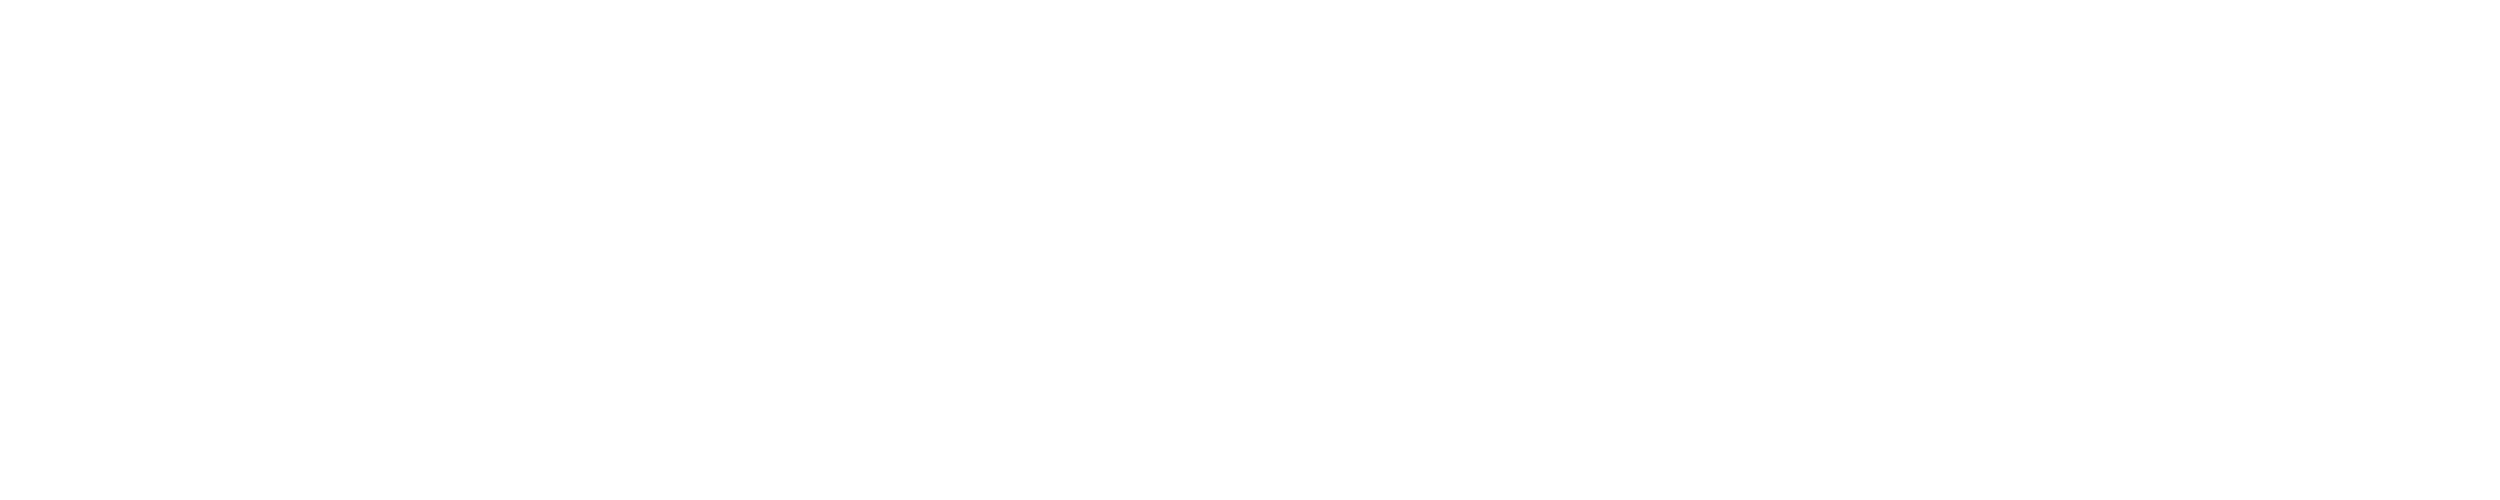

<IPython.core.display.Javascript object>


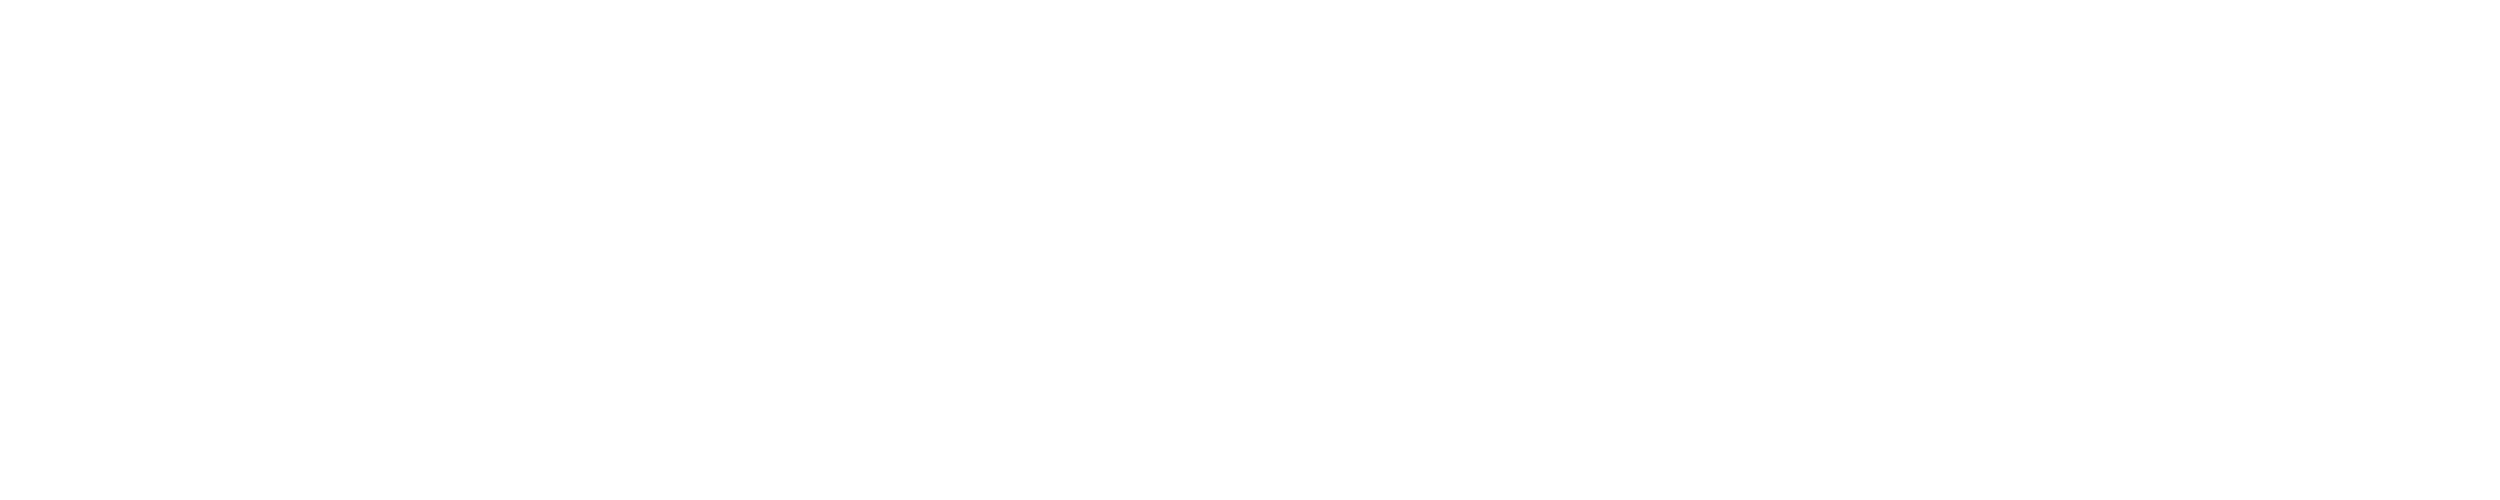

<IPython.core.display.Javascript object>


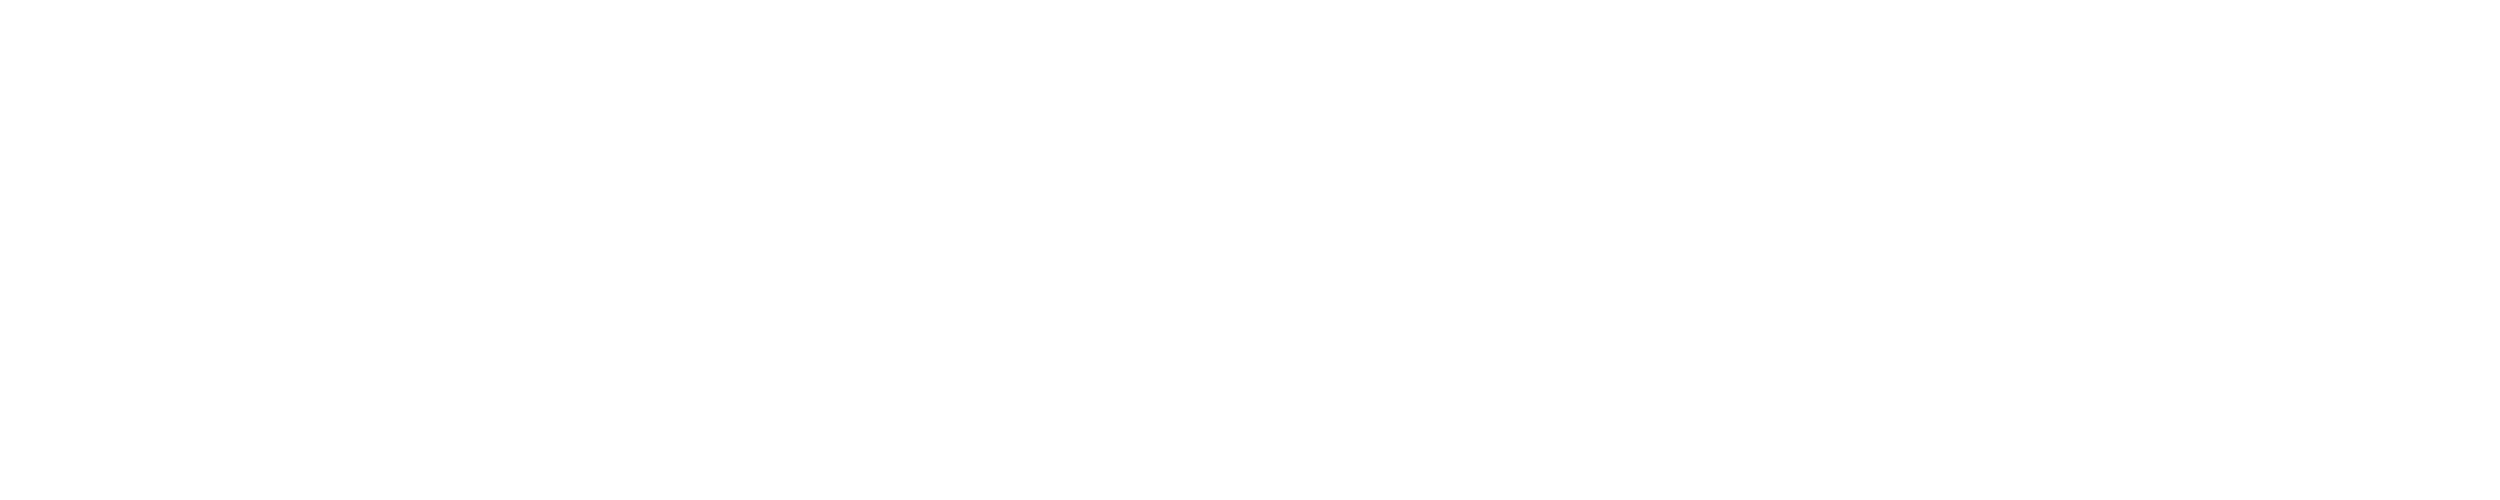

In [9]:
for i in indices:
    #plot both models for 1 region
    with plt.style.context('fivethirtyeight'):
        plt.rcParams["figure.figsize"] = (20,4)
        plt.plot(timeHealthyOne, HealthyOne[:,i].T, color = "green",linewidth=0.5)
        plt.plot(timeDepr, Depressed[:,i].T, color = "red",linewidth=0.5)
        plt.ylim(0, 0.45)

    
    #Save the figure
    fig_name = str(i) + "TSR_plot15s.png" #maak figuur naam op basis van loop
    plt.savefig(fig_name, dpi = 300, bbox_inches = "tight")
    plt.close()


Back to FFT: first change directory to save images in right folder

In [10]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/FFT")

In [11]:
#important variables of dataset
sample_period = 0.9765625 #ms
sample_rate = 1024
duration = len(timeDepr)

<IPython.core.display.Javascript object>


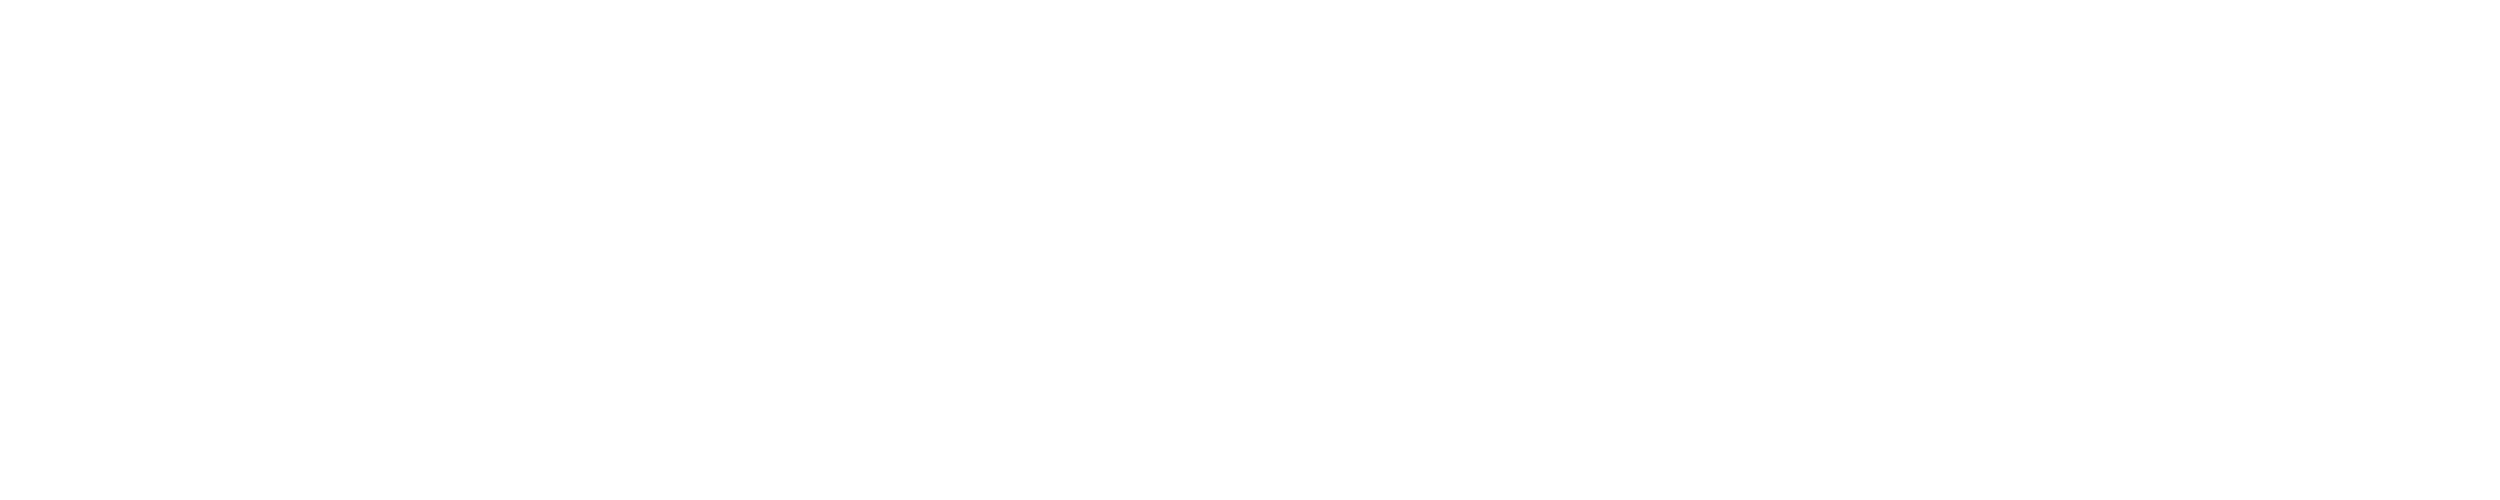

<IPython.core.display.Javascript object>


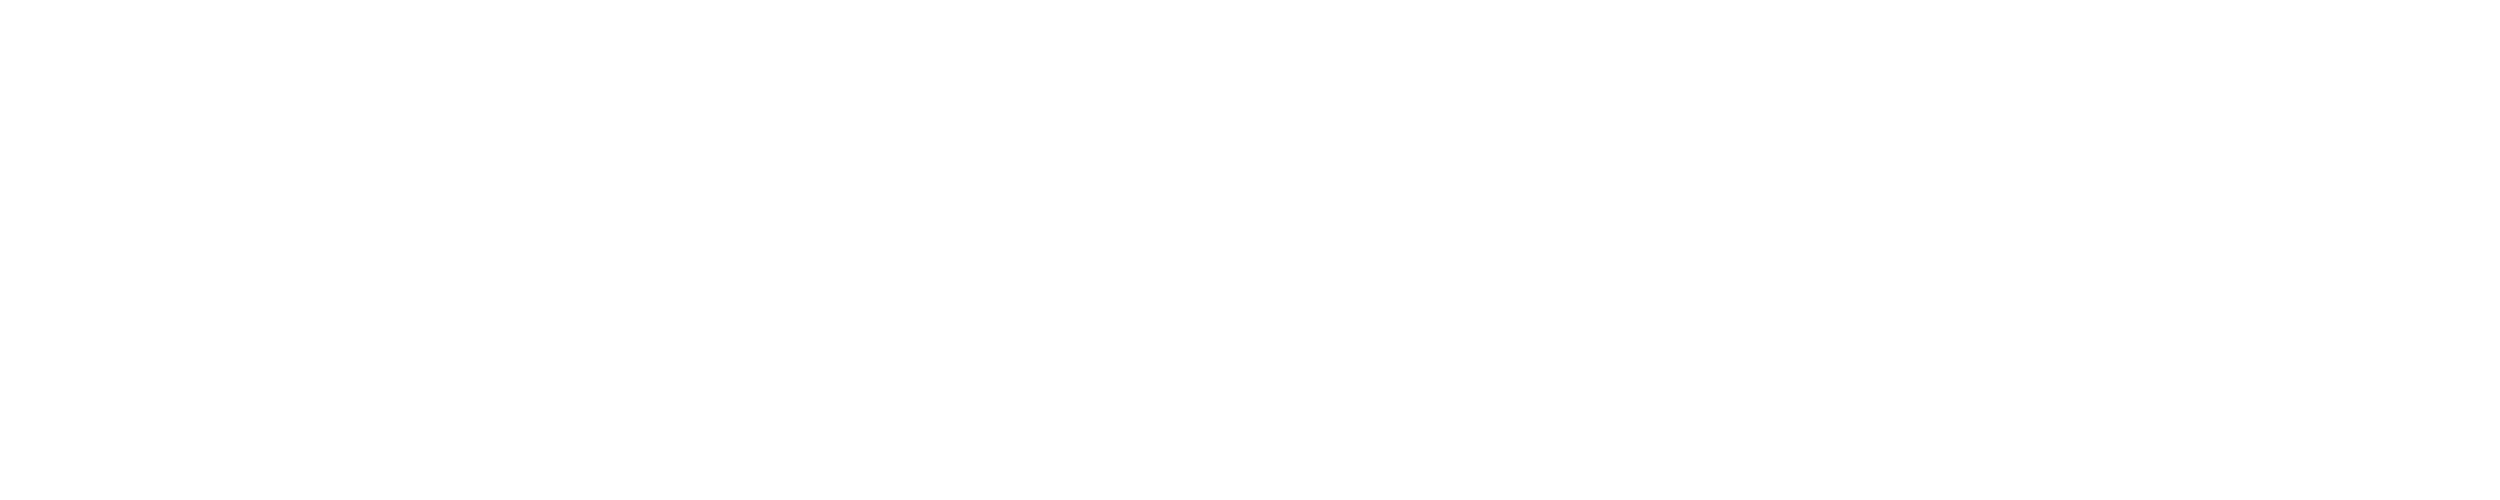

<IPython.core.display.Javascript object>


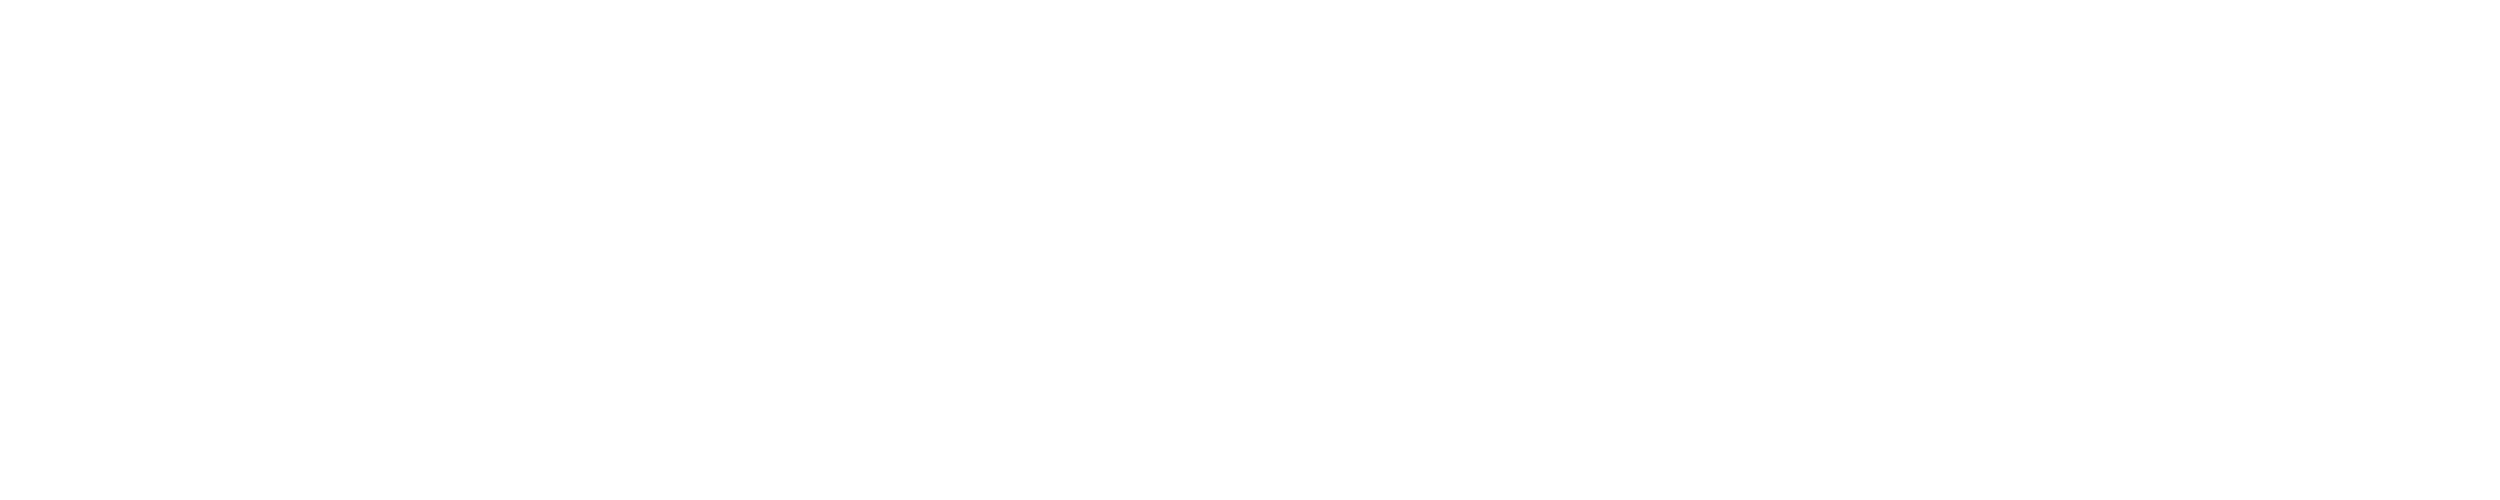

In [12]:
for node in indices:

    #select appropriate data (for certain region)
    dataHealth = HealthyOne[:,node].T
    dataDepr = Depressed[:,node].T

    #compute FFT for depressed brain 
    temp_fft = scipy.fftpack.fft(dataDepr)
    temp_psd = np.abs(temp_fft) ** 2  #Power spectral density 
    fftfreq = scipy.fftpack.fftfreq(len(temp_psd), 1. / duration)
    i_depr = fftfreq > 0

    x_depr = fftfreq[i_depr]
    y_depr = 10 * np.log10(temp_psd[i_depr])

    #compute FFT for healthy brain 
    temp_fft = scipy.fftpack.fft(dataHealth)
    temp_psd = np.abs(temp_fft) ** 2
    fftfreq = scipy.fftpack.fftfreq(len(temp_psd), 1. / duration)
    i_health = fftfreq > 0

    x_health = fftfreq[i_health]
    y_health = 10 * np.log10(temp_psd[i_health])
    
    #plot both healthy and depressed FFT together 
    with plt.style.context('fivethirtyeight'):
        plt.rcParams["figure.figsize"] = (20,4)
        plt.plot(x_health, y_health, color = "green",linewidth=0.5)
        plt.plot(x_depr, y_depr, color = "red",linewidth=0.5)
        plt.ylim(0, 50)
        plt.xlim(0, 100)
    
    
    #Save the figure
    plot_name = str(node) + "FFT_plot15s.png" 
    plt.savefig(plot_name, dpi = 300, bbox_inches = "tight")
    
    #empty plot before creating the following one
    plt.close()


In [13]:
#mean and variance: https://mark-kramer.github.io/Case-Studies-Python/03.html#visual-inspection
x = dataHealth

mn = x.mean()  # Compute the mean of the data
vr = x.var()   # Compute the variance of the data
sd = x.std()   # Compute the standard deviation of the data

print('mn = ' + str(mn))
print('vr = ' + str(vr))
print('sd = ' + str(sd))

mn = 0.13361267083012487
vr = 0.009937609168959523
sd = 0.09968755774398089


In [14]:
x = dataDepr
mn = x.mean()  # Compute the mean of the data
vr = x.var()   # Compute the variance of the data
sd = x.std()   # Compute the standard deviation of the data

print('mn = ' + str(mn))
print('vr = ' + str(vr))
print('sd = ' + str(sd))

mn = 0.16999721011936386
vr = 0.01674476093549438
sd = 0.12940154920051916


<IPython.core.display.Javascript object>


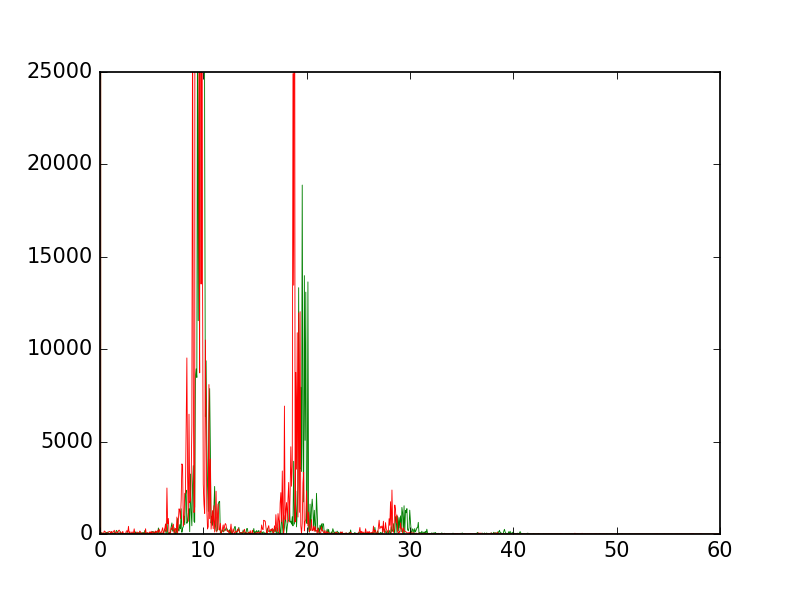

In [15]:
sampling_rate = 1024

#healthy data
fourier_transform = np.fft.rfft(HealthyOne[:,18].T)
abs_fourier_transform = np.abs(fourier_transform)
power_spectrum_health = np.square(abs_fourier_transform)
frequency_health = np.linspace(0, sampling_rate/2, len(power_spectrum_health))

#depressed data
fourier_transform = np.fft.rfft(Depressed [:,18].T)
abs_fourier_transform = np.abs(fourier_transform)
power_spectrum_depr = np.square(abs_fourier_transform)
frequency_depr = np.linspace(0, sampling_rate/2, len(power_spectrum_depr))

figure(1)
#plot both healthy and depressed FFT together 

with plt.style.context('classic'):
    #plt.rcParams["figure.figsize"] = (10,100)
    plt.xlim(0, 60)
    plt.ylim(0, 25000)
    plt.plot(frequency_health, power_spectrum_health, linewidth=0.5, color = "green")
    plt.plot(frequency_depr, power_spectrum_depr, linewidth=0.5, color = "red")
    
    plot_name = "15s_FFT.png"
    plt.savefig(plot_name, dpi = 300, bbox_inches = "tight")